# Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import csv
from scipy.stats import norm, skew
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
import pickle

In [2]:
#importing data
df=pd.read_csv("../datasets/train.csv",index_col="Id")
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [3]:
df.shape

(2051, 80)

## Replace with numpy nan values

In [4]:
# replacing "nan" with np.nan
df =df.replace("nan", np.nan)

## Dropping duplicate rows

In [5]:
df.drop_duplicates(keep="first", inplace=True)

In [6]:
df.shape

(2051, 80)

## Dropping unwanted columns

In [7]:
df.drop(columns=["PID"],inplace=True)

## Clean Corrupted columns(why the column that should be numeric is object??

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 109 to 10
Data columns (total 79 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2051 non-null   int64  
 1   MS Zoning        2051 non-null   object 
 2   Lot Frontage     1721 non-null   float64
 3   Lot Area         2051 non-null   int64  
 4   Street           2051 non-null   object 
 5   Alley            140 non-null    object 
 6   Lot Shape        2051 non-null   object 
 7   Land Contour     2051 non-null   object 
 8   Utilities        2051 non-null   object 
 9   Lot Config       2051 non-null   object 
 10  Land Slope       2051 non-null   object 
 11  Neighborhood     2051 non-null   object 
 12  Condition 1      2051 non-null   object 
 13  Condition 2      2051 non-null   object 
 14  Bldg Type        2051 non-null   object 
 15  House Style      2051 non-null   object 
 16  Overall Qual     2051 non-null   int64  
 17  Overall Cond  

In [9]:
#drop unwanted columns
df.drop(columns=["Street","Alley","Fireplace Qu","Misc Feature","Fence","Pool QC","Lot Frontage"],inplace=True)

## There is no corrupted column

## Droping missing values in numerical data

In [10]:
df.columns[df.isna().any()].tolist()

['Mas Vnr Type',
 'Mas Vnr Area',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Garage Type',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Cars',
 'Garage Area',
 'Garage Qual',
 'Garage Cond']

## Filling missing values for columns with large number of missing values for numerical data

In [11]:
#imputing with mean
df = df.fillna(df.median().iloc[0])

## Filling missing values for columns with large number of missing values for categorical data

In [12]:
df = df.fillna(df.mode().iloc[0])


In [13]:
df.isnull().sum().sum()

0

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MS SubClass,2051.0,57.008776,42.824223,20.0,20.0,50.0,70.0,190.0
Lot Area,2051.0,10065.208191,6742.488909,1300.0,7500.0,9430.0,11513.5,159000.0
Overall Qual,2051.0,6.112140,1.426271,1.0,5.0,6.0,7.0,10.0
Overall Cond,2051.0,5.562165,1.104497,1.0,5.0,5.0,6.0,9.0
Year Built,2051.0,1971.708922,30.177889,1872.0,1953.5,1974.0,2001.0,2010.0
Year Remod/Add,2051.0,1984.190151,21.036250,1950.0,1964.5,1993.0,2004.0,2010.0
Mas Vnr Area,2051.0,99.162847,174.097088,0.0,0.0,0.0,159.0,1600.0
BsmtFin SF 1,2051.0,442.109215,461.172982,0.0,0.0,368.0,733.5,5644.0
BsmtFin SF 2,2051.0,47.960020,164.960659,0.0,0.0,0.0,0.0,1474.0
Bsmt Unf SF,2051.0,567.475865,444.993115,0.0,220.0,474.0,811.0,2336.0


In [15]:
df.shape

(2051, 72)

# Visaullization

## Finding outliers

In [16]:
#function to plot in subplots and one figure of box plots
def subplot_boxplot(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/3)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=3,figsize=(20, 40)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].boxplot(dataframe[column],'red')
        ax[i].set_title(str(list_of_titles[i]))# feel free to add more settings
        # Set titles, labels, etc here for each subplot

In [17]:
list_of_titles_boxplots=[]
for items in list(df.select_dtypes(exclude=['object']).columns):
    list_of_titles_boxplots.append("Box Plot of"+" "+items)

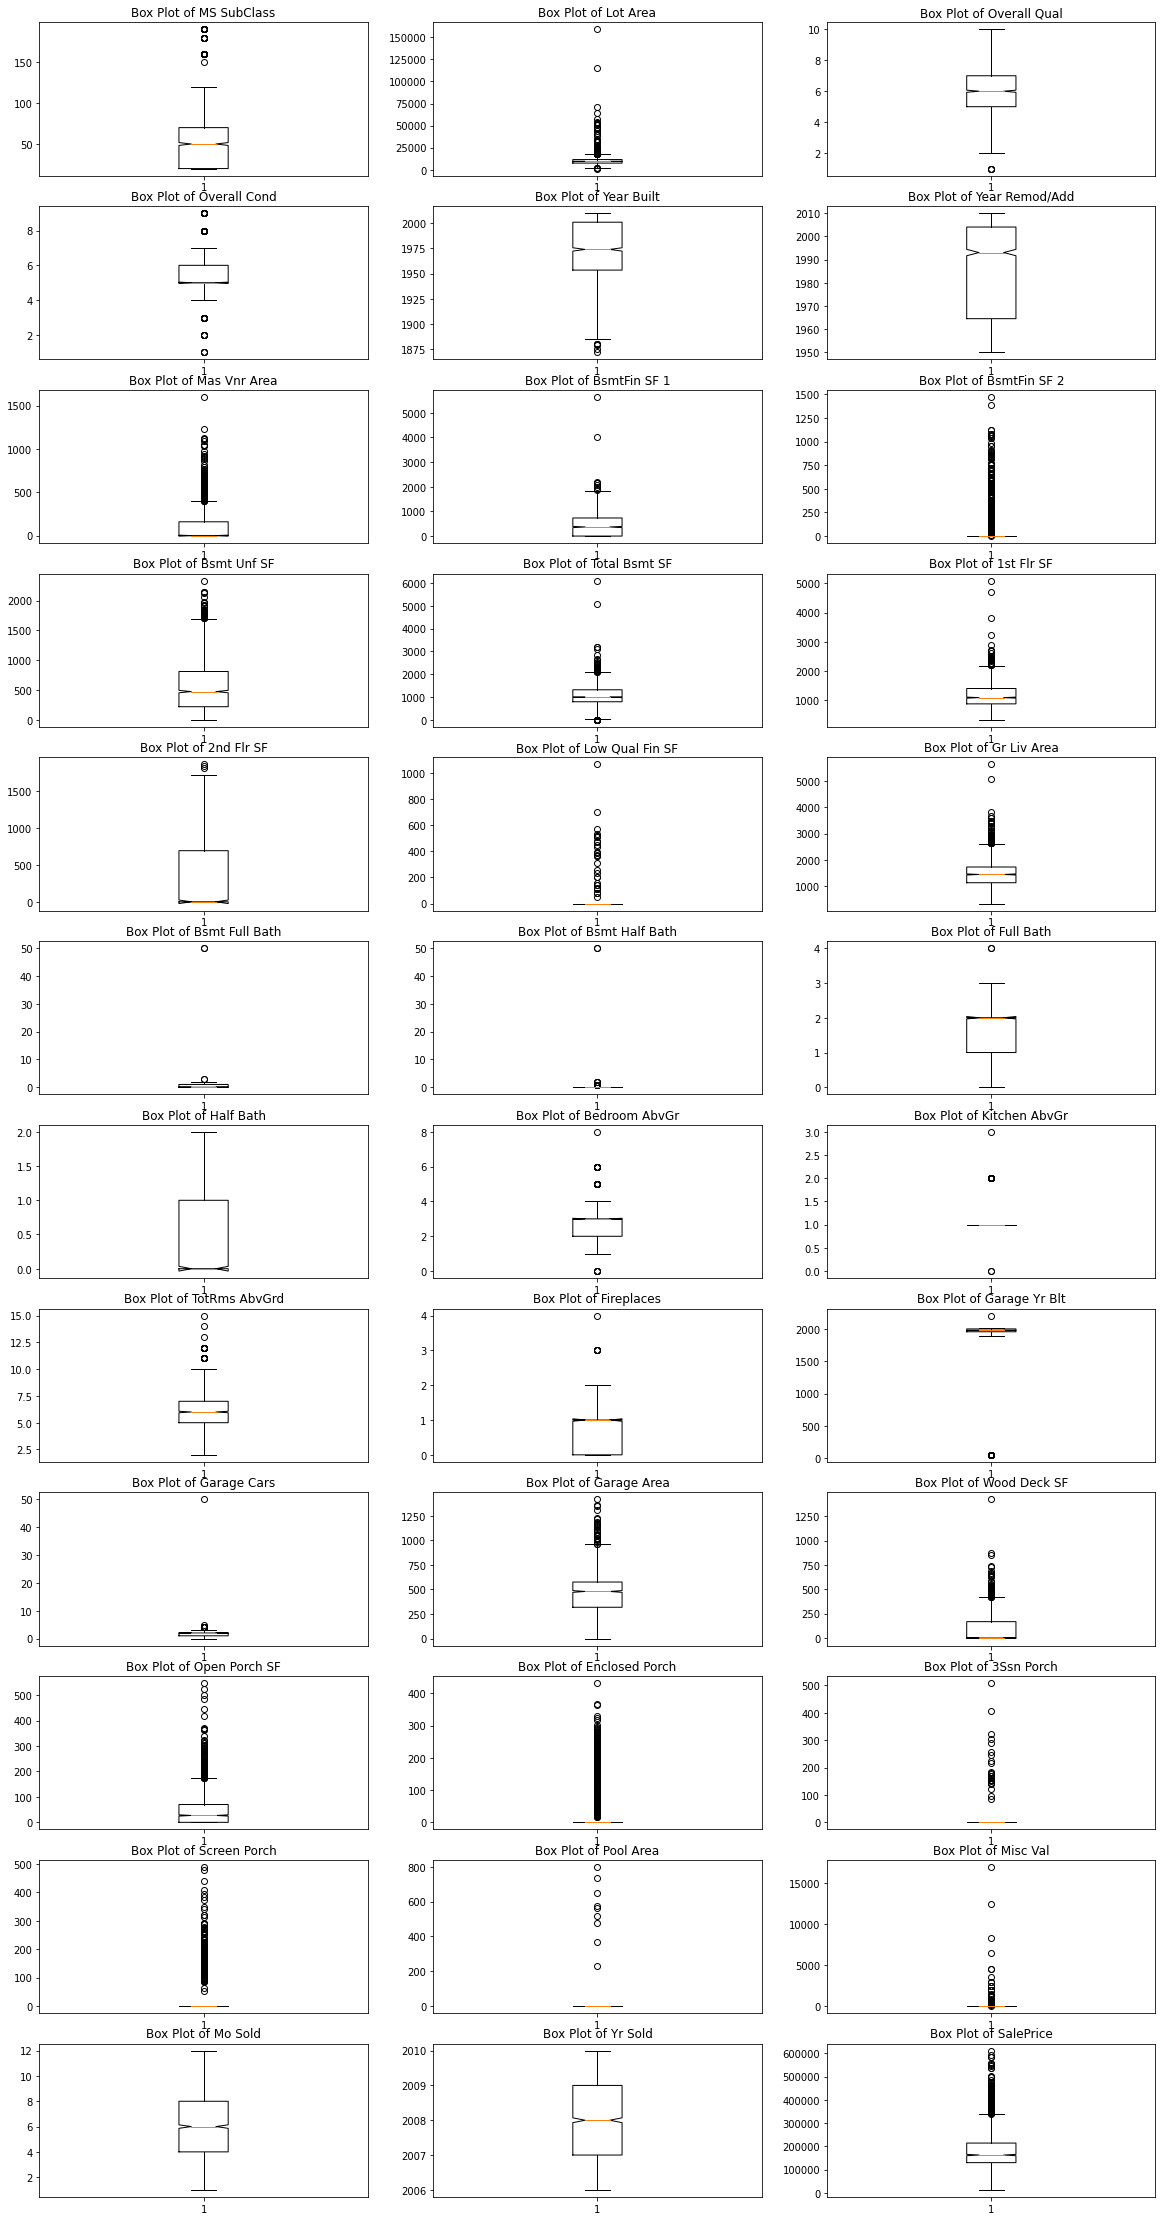

In [18]:
subplot_boxplot(df,list(df.select_dtypes(exclude=['object']).columns),list_of_titles_boxplots, None)
plt.savefig('../plots/boxplots1.png', dpi=235)

## Handling outliers

In [19]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [20]:
df=remove_outlier(df,"SalePrice")

### Note that there are 2 extremely low price outliers

In [21]:
df[df.SalePrice < 20000]

,MS SubClass,MS Zoning,Lot Area,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1554,20,A (agr),14584,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,...,0,0,0,0,0,0,2,2008,WD,13100
182,30,RM,9656,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,...,0,0,0,0,0,0,6,2010,WD,12789


In [22]:
df.drop(index=[182, 1554], inplace=True)

## Heat map

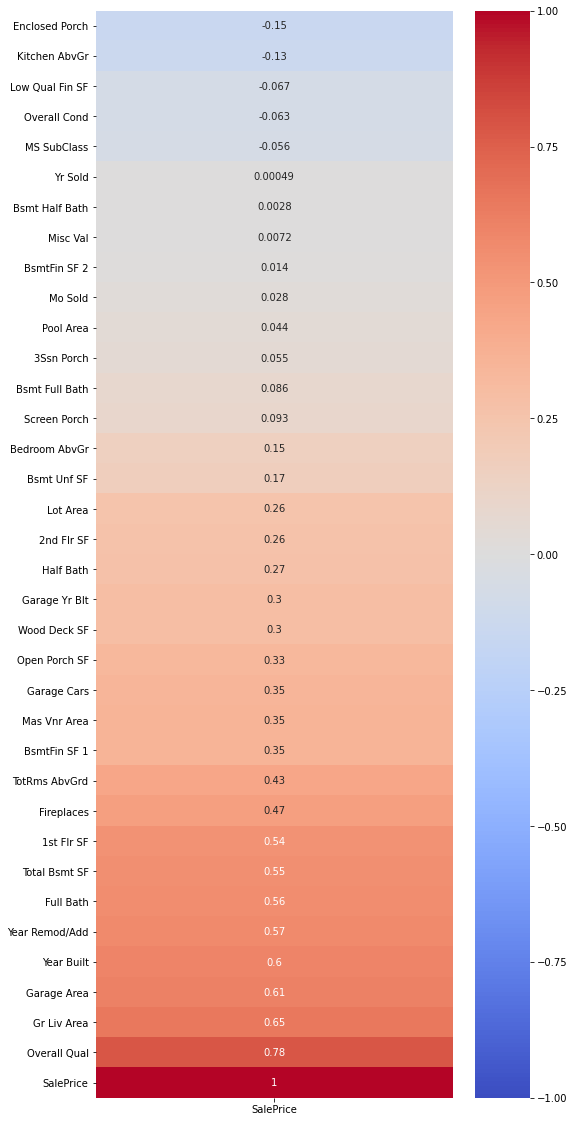

In [23]:
plt.figure(figsize=(8, 20))
sns.heatmap(df.corr()[["SalePrice"]].sort_values("SalePrice"),
            annot=True, 
            cmap="coolwarm",
           vmin=-1,
           vmax=1)
plt.savefig('../plots/heatmap1.png', dpi=235)

## removing features with small correlation with the target 

In [16]:
df.drop(columns=["Misc Val","Bsmt Half Bath","Yr Sold"],inplace=True)

## Encode a couple of discrete numeric columns as object before dummying

In [17]:
df[['Overall Cond', 'Overall Qual']] = df[['Overall Cond', 'Overall Qual']].astype('object')

## Making a simple feature selection

In [18]:
df_simple=df

In [27]:
df_simple = pd.get_dummies(df_simple, drop_first = True)

In [28]:
df_co_simple=abs(df_simple.corr()[["SalePrice"]]).sort_values("SalePrice",ascending=False).reset_index()

In [29]:
df_co_simple=df_co_simple[df_co_simple["SalePrice"]>0.2]

In [30]:
column_list=df_co_simple["index"]

In [31]:
df_simple=df_simple[column_list]

In [32]:
df_simple

,SalePrice,Gr Liv Area,Garage Area,Exter Qual_TA,Year Built,Exter Qual_Gd,Year Remod/Add,Full Bath,Kitchen Qual_TA,Total Bsmt SF,...,Lot Area,Sale Type_New,Bsmt Exposure_Gd,Neighborhood_Somerst,Neighborhood_OldTown,House Style_2Story,MS Zoning_RL,Mas Vnr Type_Stone,Bsmt Exposure_No,Neighborhood_IDOTRR
Id,,,,,,,,,,,,,,,,,,,,,
109,130500,1479,475.0,0,1976,1,2005,2,0,725.0,...,13517,0,0,0,0,1,1,0,1,0
544,220000,2122,559.0,0,1996,1,1997,2,0,913.0,...,11492,0,0,0,0,1,1,0,1,0
153,109000,1057,246.0,1,1953,0,2007,1,0,1057.0,...,7922,0,0,0,0,0,1,0,1,0
318,174000,1444,400.0,1,2006,0,2007,2,1,384.0,...,9802,0,0,0,0,1,1,0,1,0
255,138500,1445,484.0,1,1900,0,1993,2,1,676.0,...,14235,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,298751,1728,520.0,0,2007,1,2007,2,0,1884.0,...,11449,0,0,0,0,0,1,0,0,0
785,82500,861,539.0,1,1940,0,1950,1,1,861.0,...,12342,0,0,0,0,0,1,0,1,0
916,177000,1913,342.0,1,1928,0,1950,1,1,896.0,...,7558,0,0,0,0,0,1,0,1,0


In [33]:
X_s = df_simple.drop('SalePrice', axis = 1)
y_s = df_simple['SalePrice']

In [34]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_s,y_s, random_state = 42 )

In [35]:
X_train1.to_csv('../datasets/X_train1.csv')

In [36]:
X_test1.to_csv('../datasets/X_test1.csv')

In [37]:
y_train1.to_pickle('../datasets/y_train1.csv')

In [38]:
y_test1.to_pickle('../datasets/y_test1.csv')

## Apply Variance Threshold to remove low variance features

In [19]:
X1=df.drop(columns=["SalePrice"])
X1=X1.select_dtypes(exclude=["object"])

In [20]:
X1

,MS SubClass,Lot Area,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,...,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Mo Sold
Id,,,,,,,,,,,,,,,,,,,,,
109,60,13517,1976,2005,289.0,533.0,0.0,192.0,725.0,725,...,1976.0,2.0,475.0,0,44,0,0,0,0,3
544,60,11492,1996,1997,132.0,637.0,0.0,276.0,913.0,913,...,1997.0,2.0,559.0,0,74,0,0,0,0,4
153,20,7922,1953,2007,0.0,731.0,0.0,326.0,1057.0,1057,...,1953.0,1.0,246.0,0,52,0,0,0,0,1
318,60,9802,2006,2007,0.0,0.0,0.0,384.0,384.0,744,...,2007.0,2.0,400.0,100,0,0,0,0,0,4
255,50,14235,1900,1993,0.0,0.0,0.0,676.0,676.0,831,...,1957.0,2.0,484.0,0,59,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,20,11449,2007,2007,0.0,1011.0,0.0,873.0,1884.0,1728,...,2007.0,2.0,520.0,0,276,0,0,0,0,1
785,30,12342,1940,1950,0.0,262.0,0.0,599.0,861.0,861,...,1961.0,2.0,539.0,158,0,0,0,0,0,3
916,50,7558,1928,1950,0.0,0.0,0.0,896.0,896.0,1172,...,1929.0,2.0,342.0,0,0,0,0,0,0,3


In [21]:
threshold = VarianceThreshold(1)

In [22]:
X_t= threshold.fit_transform(X1)

In [23]:
with open('../assets/thresh.pkl', 'wb+') as f:
    pickle.dump(threshold, f)

In [24]:
columns = X1.columns[threshold.get_support()]

In [25]:
X1=pd.DataFrame(X_t, columns=columns)

## polynomial feature producing

## Use sklearn feature polynomial

In [26]:
features=X1.columns.tolist()

In [27]:
poly = PolynomialFeatures(interaction_only=True,include_bias=False)

In [28]:
X_poly = poly.fit_transform(X1)

In [29]:
with open('../assets/poly.pkl', 'wb+') as f:
    pickle.dump(poly, f)

In [30]:
df1=pd.DataFrame(X_poly, columns=poly.get_feature_names(features))

In [31]:
df2=df.select_dtypes(include=["object"])
df2 = df2.reset_index(drop = True)

In [32]:
df2.isnull().sum().sum()

0

In [34]:
df1

,MS SubClass,Lot Area,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,...,Enclosed Porch 3Ssn Porch,Enclosed Porch Screen Porch,Enclosed Porch Pool Area,Enclosed Porch Mo Sold,3Ssn Porch Screen Porch,3Ssn Porch Pool Area,3Ssn Porch Mo Sold,Screen Porch Pool Area,Screen Porch Mo Sold,Pool Area Mo Sold
0,60.0,13517.0,1976.0,2005.0,289.0,533.0,0.0,192.0,725.0,725.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,60.0,11492.0,1996.0,1997.0,132.0,637.0,0.0,276.0,913.0,913.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20.0,7922.0,1953.0,2007.0,0.0,731.0,0.0,326.0,1057.0,1057.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,60.0,9802.0,2006.0,2007.0,0.0,0.0,0.0,384.0,384.0,744.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,50.0,14235.0,1900.0,1993.0,0.0,0.0,0.0,676.0,676.0,831.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,20.0,11449.0,2007.0,2007.0,0.0,1011.0,0.0,873.0,1884.0,1728.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2047,30.0,12342.0,1940.0,1950.0,0.0,262.0,0.0,599.0,861.0,861.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2048,50.0,7558.0,1928.0,1950.0,0.0,0.0,0.0,896.0,896.0,1172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2049,20.0,10400.0,1956.0,1956.0,0.0,155.0,750.0,295.0,1200.0,1200.0,...,0.0,0.0,0.0,1540.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
df2

,MS Zoning,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,...,Central Air,Electrical,Kitchen Qual,Functional,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type
0,RL,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,...,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD
1,RL,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,...,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD
2,RL,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,...,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD
3,RL,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,...,Y,SBrkr,TA,Typ,BuiltIn,Fin,TA,TA,Y,WD
4,RL,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,...,Y,SBrkr,TA,Typ,Detchd,Unf,TA,TA,N,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,RL,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,...,Y,SBrkr,Gd,Typ,Attchd,Fin,TA,TA,Y,WD
2047,RL,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,...,Y,SBrkr,TA,Typ,Detchd,Unf,TA,TA,Y,WD
2048,RL,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,...,Y,SBrkr,TA,Typ,Detchd,Unf,Fa,Fa,Y,WD
2049,RL,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,...,Y,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD


In [33]:
df3=pd.concat([df2,df1],axis=1)

In [54]:
df['SalePrice'].isnull().sum()

0

In [55]:
df=df.reset_index(drop=False)

In [56]:
df3['SalePrice'] = df['SalePrice']

In [57]:
df3

,MS Zoning,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,...,Enclosed Porch Screen Porch,Enclosed Porch Pool Area,Enclosed Porch Mo Sold,3Ssn Porch Screen Porch,3Ssn Porch Pool Area,3Ssn Porch Mo Sold,Screen Porch Pool Area,Screen Porch Mo Sold,Pool Area Mo Sold,SalePrice
0,RL,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,130500
1,RL,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,220000
2,RL,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,109000
3,RL,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,174000
4,RL,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,RL,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,298751
1951,RL,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82500
1952,RL,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,177000
1953,RL,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,...,0.0,0.0,1540.0,0.0,0.0,0.0,0.0,0.0,0.0,144000


In [58]:
df3.isnull().sum().sum()

0

In [59]:
df3["Id"] = df["Id"] 

In [60]:
df3=df3.set_index("Id")

In [61]:
df=df3

In [62]:
df

,MS Zoning,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,...,Enclosed Porch Screen Porch,Enclosed Porch Pool Area,Enclosed Porch Mo Sold,3Ssn Porch Screen Porch,3Ssn Porch Pool Area,3Ssn Porch Mo Sold,Screen Porch Pool Area,Screen Porch Mo Sold,Pool Area Mo Sold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
109,RL,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,130500
544,RL,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,220000
153,RL,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,109000
318,RL,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,174000
255,RL,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,RL,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,298751
785,RL,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82500
916,RL,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,177000


# Dummies

## For external quality

In [63]:
df_ex_qu=pd.get_dummies(df["Exter Qual"],drop_first = True )

In [64]:
df_ex_qu=pd.concat([df_ex_qu,df["SalePrice"]],axis=1)

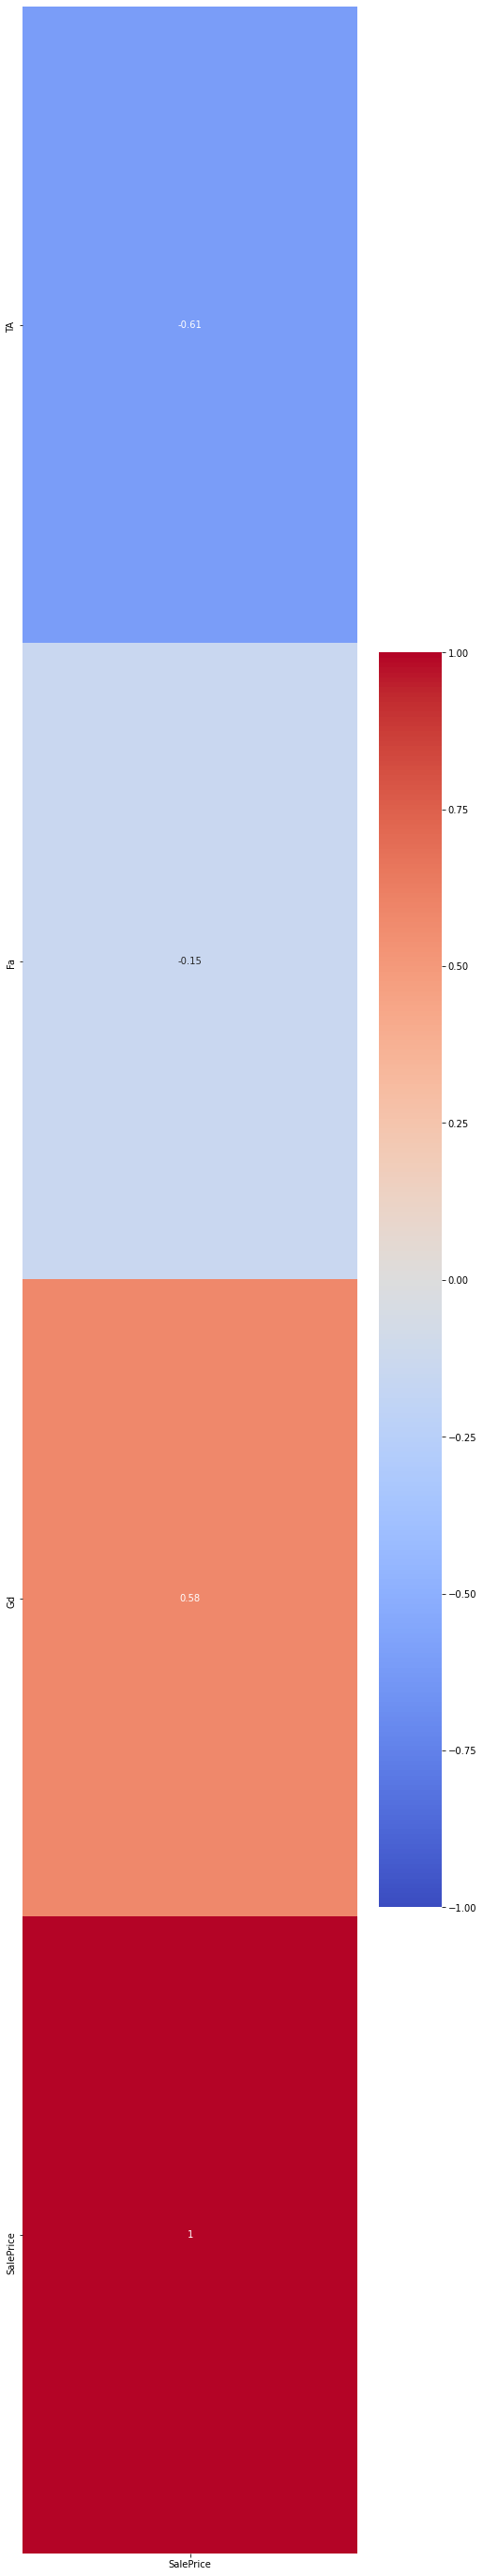

In [65]:
plt.figure(figsize=(8, 50))
sns.heatmap(df_ex_qu.corr()[["SalePrice"]].sort_values("SalePrice"),
            annot=True, 
            cmap="coolwarm",
           vmin=-1,
           vmax=1)

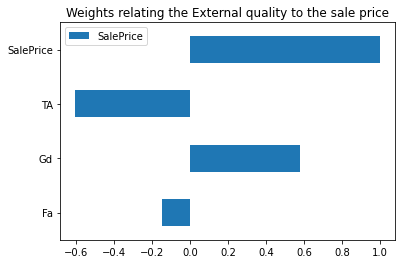

In [66]:
df_ex_qu.corr()[["SalePrice"]].plot(kind='barh')
plt.title(f'Weights relating the External quality to the sale price')
plt.savefig('../plots/exterqual.png', dpi=235)

## For neighborhood

In [67]:
df_nb=pd.get_dummies(df["Neighborhood"],drop_first = True )

In [68]:
df_nb=pd.concat([df_nb,df["SalePrice"]],axis=1)

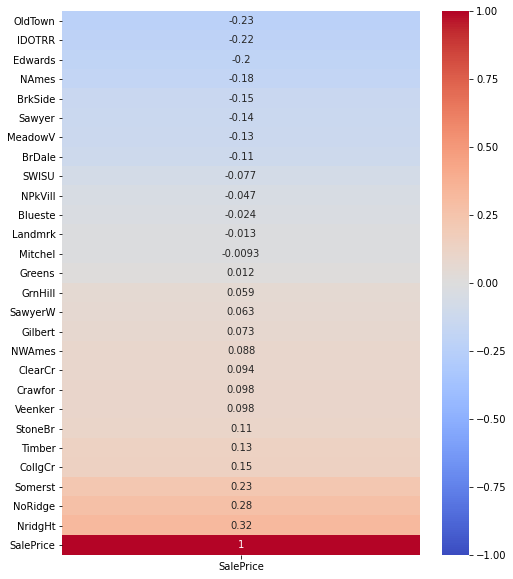

In [69]:
plt.figure(figsize=(8, 10))
sns.heatmap(df_nb.corr()[["SalePrice"]].sort_values("SalePrice"),
            annot=True, 
            cmap="coolwarm",
           vmin=-1,
           vmax=1);

<Figure size 1440x1440 with 0 Axes>

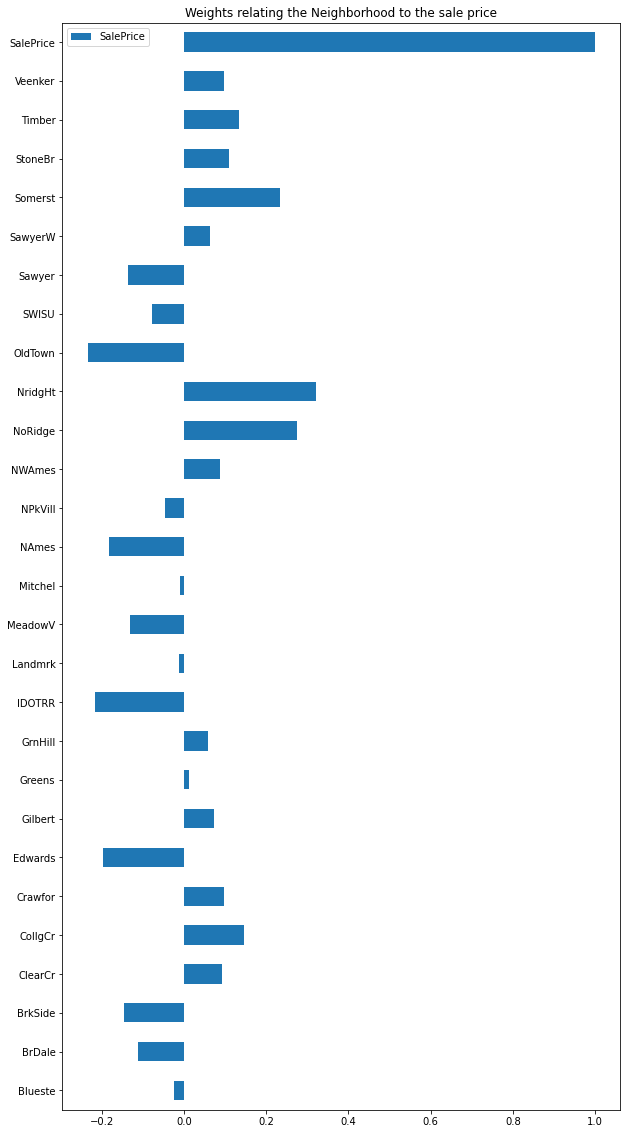

In [70]:
plt.figure(figsize=(20,20));
df_nb.corr()[["SalePrice"]].plot(kind='barh',figsize=(10,20));
plt.title(f'Weights relating the Neighborhood to the sale price')
plt.savefig('../plots/neighbor.png', dpi=235);

## For kitchen quality

In [71]:
df_kit_qu=pd.get_dummies(df["Kitchen Qual"],drop_first = True )

In [72]:
df_kit_qu=pd.concat([df_kit_qu,df["SalePrice"]],axis=1)

In [73]:
df_kit_qu.drop(columns=["SalePrice"]).columns

Index(['Fa', 'Gd', 'TA'], dtype='object')

In [74]:
df_kit_qu.corr()[["SalePrice"]]

,SalePrice
Fa,-0.174613
Gd,0.471811
TA,-0.552119
SalePrice,1.000000


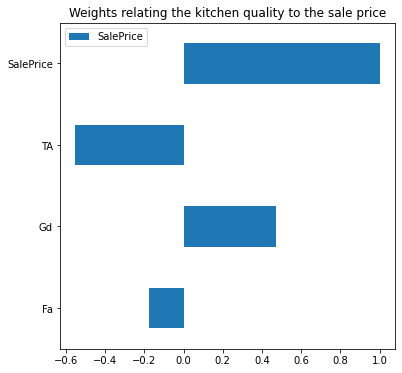

In [75]:

df_kit_qu.corr()[["SalePrice"]].plot(kind='barh',figsize=(6,6))
plt.title(f'Weights relating the kitchen quality to the sale price')
#plt.tight_layout()
plt.savefig('../plots/kitchenqual.png', dpi=235)

## For overall quality

In [76]:
df_over_qu=pd.get_dummies(df["Overall Qual"],drop_first = True )

In [77]:
df_over_qu=pd.concat([df_over_qu,df["SalePrice"]],axis=1)

In [78]:
df_over_qu.drop(columns=["SalePrice"]).columns

Index([2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='object')

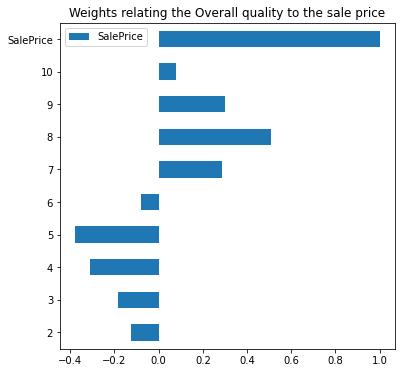

In [79]:
df_over_qu.corr()[["SalePrice"]].plot(kind='barh',figsize=(6,6))
plt.title(f'Weights relating the Overall quality to the sale price')
#plt.tight_layout()
plt.savefig('../plots/overallqual.png', dpi=235)

## Changing the categorical data to dummies

In [80]:
df.select_dtypes(include=["object"])


,MS Zoning,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,...,Central Air,Electrical,Kitchen Qual,Functional,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type
Id,,,,,,,,,,,,,,,,,,,,,
109,RL,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,...,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD
544,RL,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,...,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD
153,RL,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,...,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD
318,RL,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,...,Y,SBrkr,TA,Typ,BuiltIn,Fin,TA,TA,Y,WD
255,RL,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,...,Y,SBrkr,TA,Typ,Detchd,Unf,TA,TA,N,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,RL,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,...,Y,SBrkr,Gd,Typ,Attchd,Fin,TA,TA,Y,WD
785,RL,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,...,Y,SBrkr,TA,Typ,Detchd,Unf,TA,TA,Y,WD
916,RL,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,...,Y,SBrkr,TA,Typ,Detchd,Unf,Fa,Fa,Y,WD


In [81]:
df = pd.get_dummies(df, drop_first = True)

In [82]:
df.head()

,MS SubClass,Lot Area,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,...,Paved Drive_P,Paved Drive_Y,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
Id,,,,,,,,,,,,,,,,,,,,,
109,60.0,13517.0,1976.0,2005.0,289.0,533.0,0.0,192.0,725.0,725.0,...,0,1,0,0,0,0,0,0,0,1
544,60.0,11492.0,1996.0,1997.0,132.0,637.0,0.0,276.0,913.0,913.0,...,0,1,0,0,0,0,0,0,0,1
153,20.0,7922.0,1953.0,2007.0,0.0,731.0,0.0,326.0,1057.0,1057.0,...,0,1,0,0,0,0,0,0,0,1
318,60.0,9802.0,2006.0,2007.0,0.0,0.0,0.0,384.0,384.0,744.0,...,0,1,0,0,0,0,0,0,0,1
255,50.0,14235.0,1900.0,1993.0,0.0,0.0,0.0,676.0,676.0,831.0,...,0,0,0,0,0,0,0,0,0,1


In [83]:
df["3Ssn Porch Screen Porch"].value_counts()

0.0    1955
Name: 3Ssn Porch Screen Porch, dtype: int64

## Select high correlated features and drop low correlated feature to target variable 

In [84]:
df.corr()[["SalePrice"]].sort_values("SalePrice")

,SalePrice
Exter Qual_TA,-0.605923
Kitchen Qual_TA,-0.552119
Bsmt Qual_TA,-0.473026
Garage Finish_Unf,-0.439152
Garage Type_Detchd,-0.401799
...,...
SalePrice,1.000000
Mas Vnr Area Low Qual Fin SF,NaN
Low Qual Fin SF Pool Area,NaN
3Ssn Porch Screen Porch,NaN


In [85]:
df_co=abs(df.corr()[["SalePrice"]]).sort_values("SalePrice",ascending=False).reset_index()

In [86]:
df_co

,index,SalePrice
0,SalePrice,1.000000
1,Gr Liv Area Garage Area,0.684579
2,Year Built Gr Liv Area,0.673964
3,Gr Liv Area Garage Yr Blt,0.672516
4,Year Remod/Add Gr Liv Area,0.664097
...,...,...
543,Foundation_Wood,0.001851
544,Mas Vnr Area Low Qual Fin SF,NaN
545,Low Qual Fin SF Pool Area,NaN
546,3Ssn Porch Screen Porch,NaN


In [87]:
df_co=df_co[df_co["SalePrice"]>0.4]

In [88]:
column_list=df_co["index"]

In [89]:
#df=df[column_list]

### Heat map

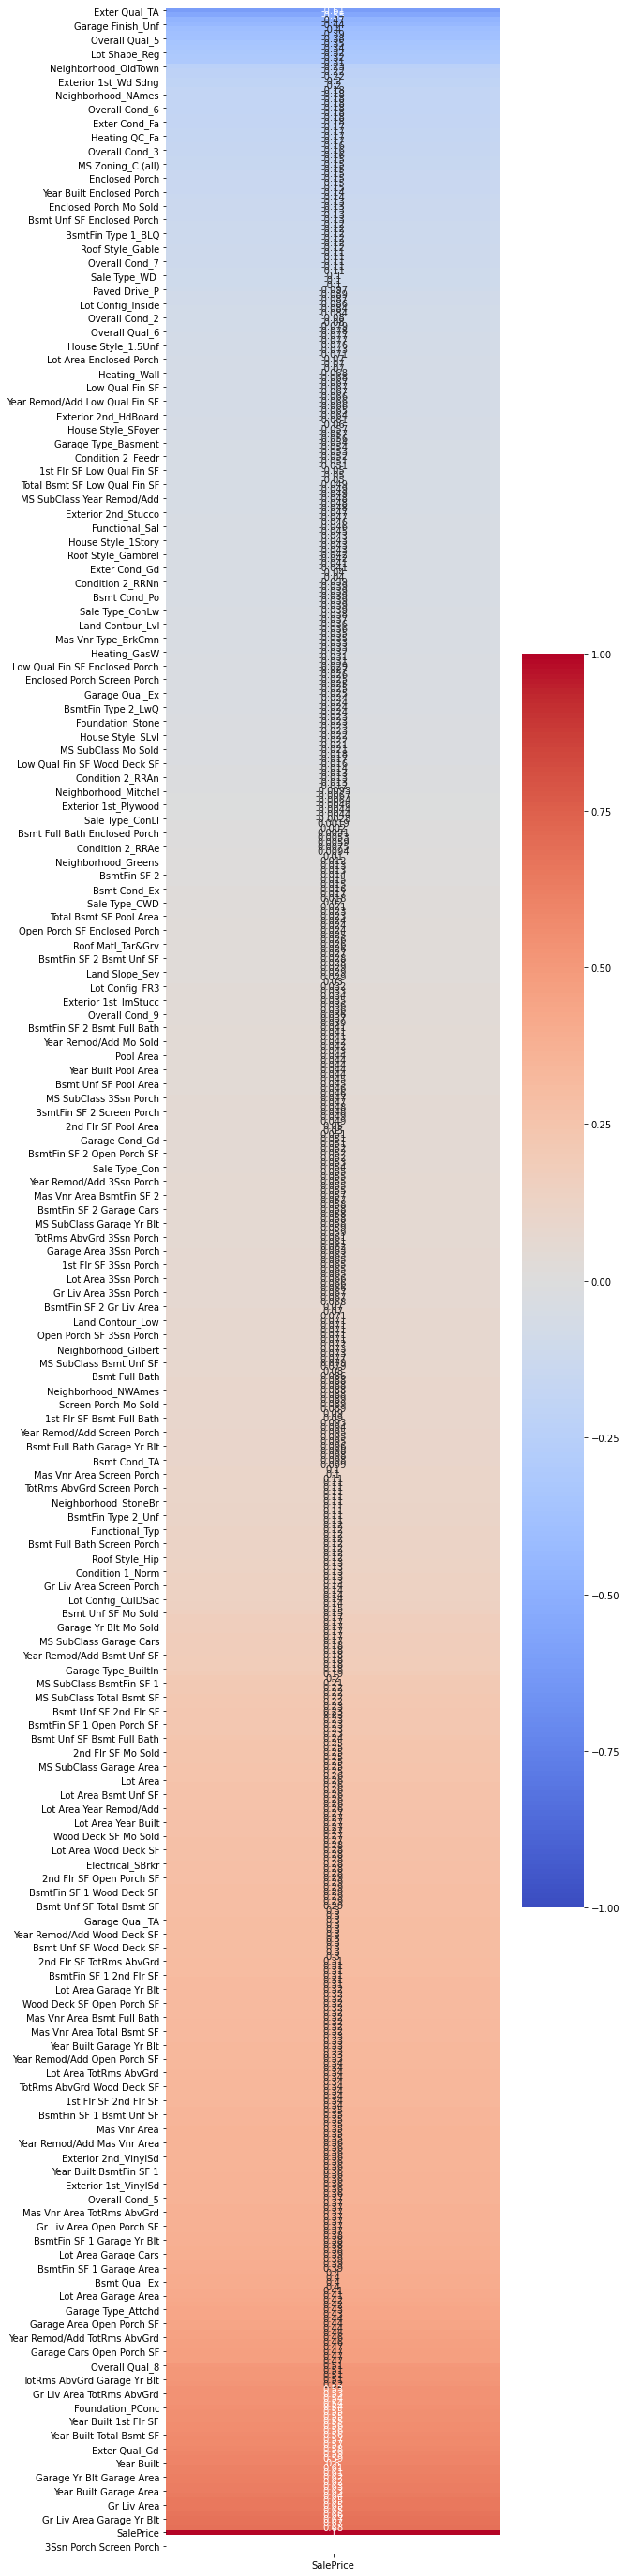

In [90]:
plt.figure(figsize=(8, 50))
sns.heatmap(df.corr()[["SalePrice"]].sort_values("SalePrice"),
            annot=True, 
            cmap="coolwarm",
           vmin=-1,
           vmax=1)
plt.savefig('../plots/heatmap2.png', dpi=235)

# Skewness of the output

## histogram plot

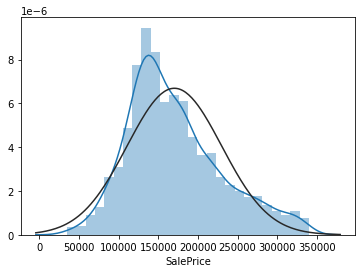

In [91]:
sns.distplot(df['SalePrice'] , fit=norm);

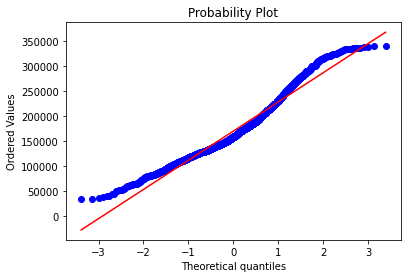

In [92]:
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)
plt.show()


In [93]:
df["price_log"]=df["SalePrice"].map(np.log)

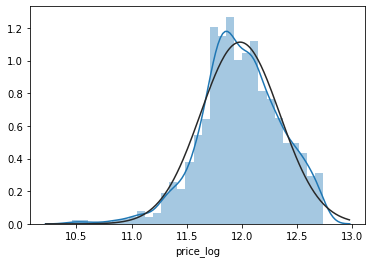

In [94]:
#Check the new distribution 
sns.distplot(df['price_log'] , fit=norm);

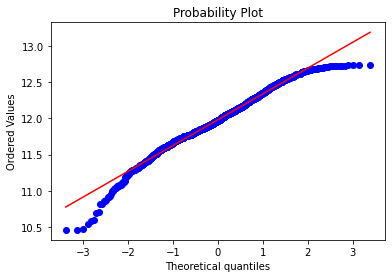

In [95]:
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['price_log'], plot=plt)
plt.show()

## it shows we need to transform the output

In [96]:
df.drop(columns=["price_log"],inplace=True)

In [97]:
pt_y = PowerTransformer()

In [98]:
pt_y.fit(df.SalePrice.to_frame())

PowerTransformer(copy=True, method='yeo-johnson', standardize=True)

In [99]:
df["SalePrice_pt"] = pt_y.transform(df.SalePrice.to_frame())

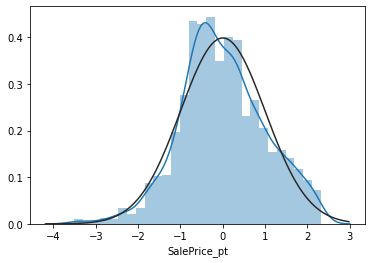

In [100]:
#Check the new distribution 
sns.distplot(df['SalePrice_pt'] , fit=norm);

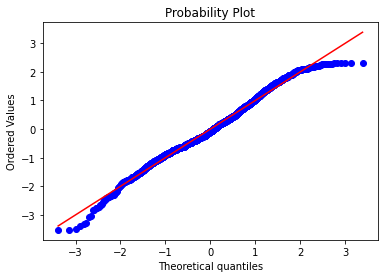

In [101]:
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['SalePrice_pt'], plot=plt)
plt.show()

In [102]:
df.drop(columns=["SalePrice_pt"],inplace=True)

## Model Prep: Create our features matrix (`X`) and target vector (`y`)

In [103]:
df=df[df["SalePrice"]!=284700]

In [104]:
X = df.drop('SalePrice', axis = 1)
y = df['SalePrice']

In [105]:
# the number of features
len(X.columns)

547

In [106]:
## Create column list for future alignment

In [107]:
columns = X.columns

In [108]:
with open('../assets/columns.pkl', 'wb+') as f:
    pickle.dump(list(X.columns), f)

# Feature engineering

## F test

In [109]:
# from sklearn.feature_selection import f_regression, mutual_info_regression

In [110]:
# f_test=f_regression(X,y)

In [111]:
# f_test /= np.max(f_test)

## Mutual info

In [112]:
# mi=mutual_info_regression(X,y)

In [113]:
# mi /= np.max(mi)

## I tried it but it doesn't improve the model

## Model Prep: Train/test split

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42 )

## export the final data

In [115]:
X_train.to_csv('../datasets/X_train.csv')

In [116]:
X_test.to_csv('../datasets/X_test.csv')

In [117]:
y_train.to_pickle('../datasets/y_train.csv')

In [118]:
y_test.to_pickle('../datasets/y_test.csv')

In [119]:
#save the trained dataframe
df.to_csv('../datasets/train_df.csv')